In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('data/Boston.csv', index_col=0).reset_index(drop=True).dropna()
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
X = data.drop(columns='medv')
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
p = len(X.columns)
m = int(np.round(np.sqrt(p),0))

R2 training score: 0.9725

MSE training error: 2.2352

R2 test score: 0.8982

MSE test error: 9.3309



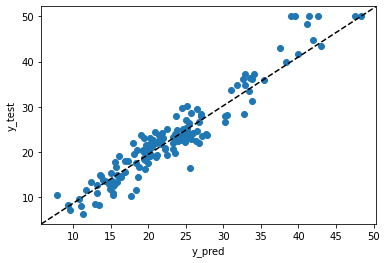

In [4]:
rdn_forests = RandomForestRegressor(max_features=6, random_state=1, n_estimators=25)
rdn_forests.fit(X_train, y_train)

# Return R2
print('R2 training score: {:.4f}'.format(rdn_forests.score(X_train, y_train)))
print('')
# Return MSE training error
print('MSE training error: {:.4f}'.format(mean_squared_error(y_train, rdn_forests.predict(X_train))))
print('')

# Calculate R2 test score
y_pred = rdn_forests.predict(X_test)
print('R2 test score: {:.4f}'.format(r2_score(y_test, y_pred)))
print('')
print('MSE test error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('')

# Plot Chart y_pred, y_test
# plt.figure(8,6)
plt.scatter(y_pred, y_test)
plt.plot([0, 1], [0, 1], '--k', transform = plt.gca().transAxes)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

R2 training score: 0.9803

MSE training error: 1.5956

R2 test score: 0.9029

MSE test error: 8.9027



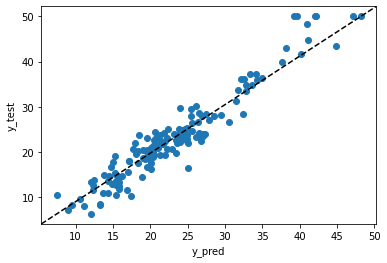

In [5]:
rdn_forests = RandomForestRegressor(max_features=6, random_state=1, n_estimators=500)
rdn_forests.fit(X_train, y_train)

# Return R2
print('R2 training score: {:.4f}'.format(rdn_forests.score(X_train, y_train)))
print('')
# Return MSE training error
print('MSE training error: {:.4f}'.format(mean_squared_error(y_train, rdn_forests.predict(X_train))))
print('')

# Calculate R2 test score
y_pred = rdn_forests.predict(X_test)
print('R2 test score: {:.4f}'.format(r2_score(y_test, y_pred)))
print('')
print('MSE test error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('')

# Plot Chart y_pred, y_test
# plt.figure(8,6)
plt.scatter(y_pred, y_test)
plt.plot([0, 1], [0, 1], '--k', transform = plt.gca().transAxes)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [6]:
# Result performing Random Forest at difference number of Trees, at multiple number features use
cv = KFold(n_splits=10, shuffle=True, random_state=1)
mse_bagging = pd.Series([])
mse_rdn_forests_1 = pd.Series([])
mse_rdn_forests_2 = pd.Series([])
for i in range(1,301):
    
    bagging = RandomForestRegressor(max_features=p, random_state=1, n_estimators=i).fit(X_train, y_train)
    random_forest_1 = RandomForestRegressor(max_features=6, random_state=1, n_estimators=i).fit(X_train, y_train)
    random_forest_2 = RandomForestRegressor(max_features=m, random_state=1, n_estimators=i).fit(X_train, y_train)

    mse_bagging.loc[i] = mean_squared_error(y_test, bagging.predict(X_test))
    mse_rdn_forests_1.loc[i] = mean_squared_error(y_test, random_forest_1.predict(X_test))
    mse_rdn_forests_2.loc[i] = mean_squared_error(y_test, random_forest_2.predict(X_test))

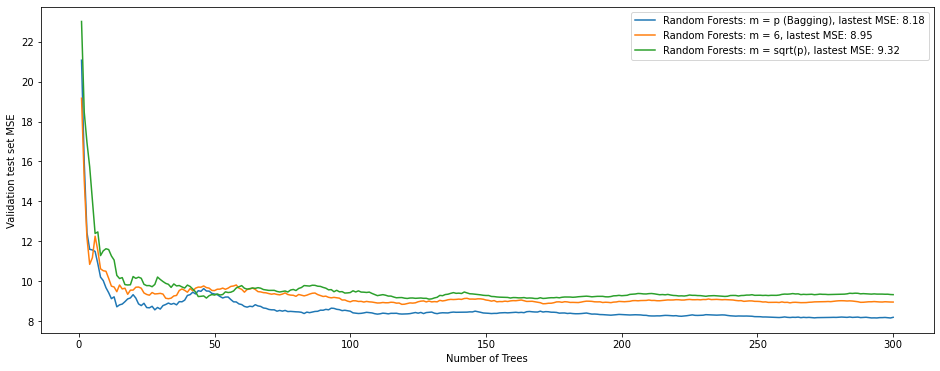

In [12]:
plt.figure(figsize=(16,6))
plt.plot(mse_bagging.index, mse_bagging, label='Random Forests: m = p (Bagging), lastest MSE: {:.2f}'.format(mse_bagging[300]))
plt.plot(mse_rdn_forests_1.index, mse_rdn_forests_1, label='Random Forests: m = 6, lastest MSE: {:.2f}'.format(mse_rdn_forests_1[300]))
plt.plot(mse_rdn_forests_2.index, mse_rdn_forests_2, label='Random Forests: m = sqrt(p), lastest MSE: {:.2f}'.format(mse_rdn_forests_2[300]))
plt.xlabel('Number of Trees')
plt.ylabel('Validation test set MSE')
plt.legend()
plt.show()

In [11]:
# Bagging seem work best